# NumPy
-------------------------------------------------------------------

Kushal Keshavamurthy Raviprakash

kushalkr2992@gmail.com

This notebook is a part of the [Python for Earth and Atmospheric Sciences](https://github.com/Kushalkr/Python_for_Earth_and_Atmospheric_Sciences) workshop.

Disclaimer: Most of the material in this notebook is derived from [Lectures on Scientific Computing with Python](http://github.com/jrjohansson/scientific-python-lectures) by Robert Johannsson.

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt # Don't worry about these two lines. 
                                #I'll explain in the future lectures

## Introduction
-------------------------------------------------------------------

**NumPy** stands for **N**umerical **Py**thon. <img height="100" src="images/numpy.png" style="float: right" />

It is part of what is called the **Sci**entific **P**ython Stack or **SciPy** stack for short. The scipy stack is a collection of packages such as NumPy, SciPy, matplotlib, SymPy, Pandas which work well together and are used extensively in the scientific community.

the `numpy` package (module) is an extension module to pure python and is used in almost all numerical computation done using python.

The `numpy` package provides high-performance vector, matrix and higher directional structures which are optimized for performance.

As mentioned in the last lecture, `numpy` is a package. It is not available in pure python by default and has to imported.

We can import the `numpy` module using any of the methods mentioned below:

```py
import numpy
```
methods are invoked with the syntax: `numpy.array()` etc...
```py
from numpy import *
```
no need to use dot `(.)` notation in this case. Ex.: `array()` suffices
```py
import numpy as np
```
the first way of importing is the better way but, it is too long. With this form of importing, we can invoke methods using the syntax: `np.array()`.

The reason the first and the third way of importing the `numpy` module or for that matter any module is best because it does not leave any room for conflict.

For Example, if you import both the `math` and the `numpy` module using the second method, 
there will be a conflict as to which definition of the *sine* function is used since both modules contain definitions of the *sine* function.

Let's jump into working with the methods and structures in the `numpy` module. 

Before doing anything, we need to import the `numpy` module.

In [2]:
import numpy as np # importing the numpy module
np.set_printoptions(precision=3) # this is to make the output look pretty

.Vectors, matrices and multi-dimension data are all called **arrays** in numpy.

In [3]:
np.__version__

'1.13.0'

## Creating Numpy arrays
-------------------------------------------------------------------

You can create numpy arrays in a number of ways. Some of the methods are:
* By converting lists and tuples
* Using array creation functions defined in the `numpy` module. Ex.: `np.linspace()`, `np.arange()` etc....
* Reading data from files and the converting it to array form.

### Converting lists and tuples

To create a vector or matrix, use the `np.array()` function with the list as the argument.

In [4]:
v = np.array([1, 2, 3, 4, 5])

v

array([1, 2, 3, 4, 5])

A matrix created by providing a nested list or tuple as argument.

In [5]:
M = np.array([[1, 2],[3, 4]])
M

array([[1, 2],
       [3, 4]])

the vector `v` and matrix `M`, both have the same type of `ndarray`.

In [6]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

We can see the **size** (# of elements in the entire array) and **shape** (# of elements in each dimension) of arrays using the `size` and `shape` attribute of the array respectively.

In [7]:
print(v.size, M.size)

5 4


In [8]:
print(v.shape, M.shape)

(5,) (2, 2)


the arrays we created look very similar to lists. Why don't we use lists directly?

The main reason is that lists are very general and because of dynamic typing, they can contain any type of data. As a result, implementing functions which handle multiple data types becomes difficult.

NumPy is statically typed. Meaning, all the elements of the array will have the same type. This allows us to implement optimized functions using compiled languages such as C and FORTRAN.

### Using array generating functions

#### `np.arange()`

In [9]:
a = np.arange(0, 1, 0.1) # arguments: start, stop, step
# It is similar to the range function. Except, you can get float arrays too.
print(a)
a = np.arange(0, 100, 10)
print(a)

[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9]
[ 0 10 20 30 40 50 60 70 80 90]


#### `np.linspace()` and `np.logspace()`

In [10]:
b = np.linspace(0,1,10)
print(b)

[ 0.     0.111  0.222  0.333  0.444  0.556  0.667  0.778  0.889  1.   ]


In [11]:
b = np.logspace(0,10,11, base=10)
b

array([  1.000e+00,   1.000e+01,   1.000e+02,   1.000e+03,   1.000e+04,
         1.000e+05,   1.000e+06,   1.000e+07,   1.000e+08,   1.000e+09,
         1.000e+10])

#### `np.mgrid()` (Similar to `meshgrid()` in MATLAB)

In [12]:
x, y =np.mgrid[0:5, 0:5]

In [13]:
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

In [14]:
y

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

#### `np.diag()`

In [15]:
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

#### `np.zeros()` and `np.ones()`

In [16]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [17]:
np.ones((5,5))

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.]])

### Reading from files

We will read in data from the file `sample.txt` and put the data into an array.

In [18]:
data = np.loadtxt('data/sample.txt', delimiter=',')

In [19]:
print(data.dtype)
print(data.shape)

float64
(100, 2)


Let me show you what the data looks like. Don't be daunted by the weird code. You will underestand it in the next lecture.

(-7.6719695703244994, 13.537726962634501, -10.488120277751001, 18.206316764531)

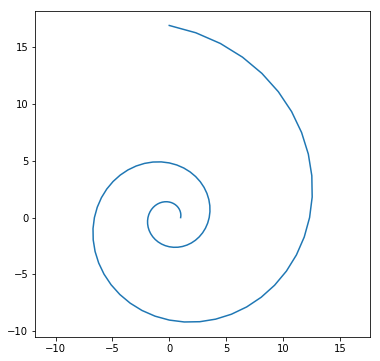

In [20]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(data[:,0], data[:,1])
ax.axis('equal')

## Manipulating Numpy arrays
-------------------------------------------------------------------

### Indexing

Indexing of elements in an array is done by providing indices within square brackets.

In [21]:
# Definition of the vector a.
a = np.linspace(0,20, 21, endpoint=True)
a

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.])

In [22]:
# Definition of the matrix M.
M = np.random.randint(0,100,size=(5,5)) * np.float64(1.)
print(M)
print(M.dtype)

[[ 49.  90.  90.  10.  45.]
 [ 81.  65.  22.   5.  48.]
 [ 92.  16.  52.  98.  39.]
 [ 74.  43.  71.  72.  37.]
 [ 28.  54.  65.  73.  49.]]
float64


In [23]:
a[4] # a is a vector and therefore has only one dimension

4.0

In [24]:
M[1,0] # M is a matrix or 2-dimensional array. As a result, requires 2 indices

81.0

Omitting indices altogether gives the entire array

In [25]:
M

array([[ 49.,  90.,  90.,  10.,  45.],
       [ 81.,  65.,  22.,   5.,  48.],
       [ 92.,  16.,  52.,  98.,  39.],
       [ 74.,  43.,  71.,  72.,  37.],
       [ 28.,  54.,  65.,  73.,  49.]])

Omitting one of the indices gives the particular *axis* of the array.

In [26]:
M[1] # Single index like so will give the second row of M

array([ 81.,  65.,  22.,   5.,  48.])

The same can be achieved with `:` instead of an index. This is much more flexible.

In [27]:
M[:,1] # second column of M

array([ 90.,  65.,  16.,  43.,  54.])

In [28]:
M[1,:] #2nd row of M

array([ 81.,  65.,  22.,   5.,  48.])

We can modify the value of an array through assignment.

In [29]:
M[0,0] = 0. # Assign 0. to the element in the first row and first column.
M

array([[  0.,  90.,  90.,  10.,  45.],
       [ 81.,  65.,  22.,   5.,  48.],
       [ 92.,  16.,  52.,  98.,  39.],
       [ 74.,  43.,  71.,  72.,  37.],
       [ 28.,  54.,  65.,  73.,  49.]])

This also works for rows and columns.

In [30]:
M[:,1] = -100. # Assign -100. to all rows in the second column
M

array([[   0., -100.,   90.,   10.,   45.],
       [  81., -100.,   22.,    5.,   48.],
       [  92., -100.,   52.,   98.,   39.],
       [  74., -100.,   71.,   72.,   37.],
       [  28., -100.,   65.,   73.,   49.]])

You can provide strides for indexing.

In [31]:
M[::2, ::2] # Return elements at every second indices

array([[  0.,  90.,  45.],
       [ 92.,  52.,  39.],
       [ 28.,  65.,  49.]])

### Fancy indexing

Fancy indexing is the name used when a list or an array is used to index elements of an array in-place of an index value.

In [32]:
row_indices = [1, 2, 4] # row numbers
M[row_indices] 

array([[  81., -100.,   22.,    5.,   48.],
       [  92., -100.,   52.,   98.,   39.],
       [  28., -100.,   65.,   73.,   49.]])

In [33]:
col_indices = [2, 4, -1] # column numbers
M[row_indices, col_indices]

array([ 22.,  39.,  49.])

You can mask out certain values using booleans.

In [34]:
b = np.array([x for x in range(5)]) # This is called a list comprehension which is then converted to an array
b

array([0, 1, 2, 3, 4])

In [35]:
row_mask = [False, True, True, False, False] # a list of booleans masking unwanted elements
b[row_mask]

array([1, 2])

In [36]:
row_mask = np.array([0,1,1,0,0], dtype=bool) # another way of defining a mask
b[row_mask]

array([1, 2])

You can use masks to conditionally select elements.

In [37]:
mask = M < 0 # Operates on individual elements and returns True or False for each element.
print(mask,"\n\n", M) # \n is an escape sequence for newline.

[[False  True False False False]
 [False  True False False False]
 [False  True False False False]
 [False  True False False False]
 [False  True False False False]] 

 [[   0. -100.   90.   10.   45.]
 [  81. -100.   22.    5.   48.]
 [  92. -100.   52.   98.   39.]
 [  74. -100.   71.   72.   37.]
 [  28. -100.   65.   73.   49.]]


In [38]:
M[mask]

array([-100., -100., -100., -100., -100.])

### Functions to find position indices and extracting data

#### `np.where()`

In [39]:
indices = np.where(mask)
indices

(array([0, 1, 2, 3, 4]), array([1, 1, 1, 1, 1]))

In [40]:
M[indices] # Similar to fancy indexing where the row and column are sent as a tuple

array([-100., -100., -100., -100., -100.])

#### `np.diag()`

The `np.diag()` function was used before to create diagonal matrices. But, the same function can be used to retrieve the diagonal and sub-diagonal elements of a matrix.

In [41]:
np.diag(M)

array([   0., -100.,   52.,   72.,   49.])

In [42]:
np.diag(M,-1) # 1st sub-diagonal below the main diagonal

array([  81., -100.,   71.,   73.])

In [43]:
np.diag(M,1) # 1st sub-diagonal above the main diagonal

array([-100.,   22.,   98.,   37.])

There are many other functions such as `np.take()` and `np.choose()` that have not been discussed here.

## Linear Algebra
-------------------------------------------------------------------

If you are going to be dealing with numerical calculations, it is better vectorize your code since vectorization allows efficient computation and faster performance. Vectorizing means to write code in terms of vector and matrix operations like matrix-vector multiplication or matrix-matrix multiplication etc...

### Scalar-Array operations

Basic arithmetic operations can be used to add subtract, divide and multiple arrays with scalars.

In [44]:
v = np.arange(5) # [0, 1, 2, 3, 4]

By default, for the `numpy.array` type, the operation is performed elementwise.

In [45]:
v * 2

array([0, 2, 4, 6, 8])

In [46]:
v + 2

array([2, 3, 4, 5, 6])

Let's create a matrix `A`.

In [47]:
A = np.array([[ i + j*5 for i in range(5)] for j in range(5)]) # List comprehension way of creating matrix A
A

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [48]:
A + 1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25]])

In [49]:
A * 2

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18],
       [20, 22, 24, 26, 28],
       [30, 32, 34, 36, 38],
       [40, 42, 44, 46, 48]])

### Matrix Algebra

Matrix multiplication is something that is done very efficiently with `numpy`. There are two methods to perform matrix-matrix, matrix-array or array-array inner products.

#### 1.Using the `np.dot()` method 

In [50]:
np.dot(A,A)

array([[ 150,  160,  170,  180,  190],
       [ 400,  435,  470,  505,  540],
       [ 650,  710,  770,  830,  890],
       [ 900,  985, 1070, 1155, 1240],
       [1150, 1260, 1370, 1480, 1590]])

In [51]:
np.dot(A,v)

array([ 30,  80, 130, 180, 230])

In [52]:
np.dot(v,v)

30

#### 2. Casting array objects to the `matrix` type 

In [53]:
M = np.matrix(A)
v = np.matrix(v).T

In [54]:
v

matrix([[0],
        [1],
        [2],
        [3],
        [4]])

In [55]:
M

matrix([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19],
        [20, 21, 22, 23, 24]])

In [56]:
M * M

matrix([[ 150,  160,  170,  180,  190],
        [ 400,  435,  470,  505,  540],
        [ 650,  710,  770,  830,  890],
        [ 900,  985, 1070, 1155, 1240],
        [1150, 1260, 1370, 1480, 1590]])

In [57]:
M * v

matrix([[ 30],
        [ 80],
        [130],
        [180],
        [230]])

In [58]:
v + M * v

matrix([[ 30],
        [ 81],
        [132],
        [183],
        [234]])

## Basic Data Processing
-------------------------------------------------------------------

Let us see some basic statistical functions that we can use to perform our data analysis.

In [59]:
data = np.random.randn(1000,1000) # Normally distributed data of 100 rows and 100 columns
data.size

1000000

In [60]:
np.max(data) # largest value in the data

4.5378902907133698

In [61]:
np.min(data) # smallest value in the data

-4.7455889607879831

In [62]:
np.mean(data) # Mean value of the given sample

-0.0001812269346109499

In [63]:
np.std(data) # Standard deviation of the sample.

1.0011676326980423

In [64]:
np.var(data) # Variance of the sample

1.0023366287622022

In [65]:
np.sum(data, axis=1)

array([ -8.175e+00,   9.504e+00,   1.968e+01,  -1.501e+01,  -1.254e+01,
         2.220e+01,  -4.729e-02,  -1.577e+01,   7.207e+01,  -1.220e+01,
        -4.624e+00,  -2.701e+01,  -2.670e+01,   6.675e+00,   2.145e+01,
         1.731e+01,  -1.848e+01,  -5.344e+00,  -5.778e+01,  -1.537e+01,
         7.764e+01,  -2.505e+01,  -1.562e+01,   2.070e+00,  -3.747e+01,
        -2.221e+01,  -4.806e+01,   2.009e+01,  -2.519e+01,   3.425e+01,
        -1.382e+00,   3.786e+00,   7.317e+01,  -1.220e+01,  -3.344e+01,
        -2.234e+01,  -9.970e+00,   1.616e+01,  -2.695e+01,   4.459e+00,
        -1.767e+01,   1.147e+01,  -1.341e+01,   3.230e-01,  -1.999e+00,
        -6.591e+00,   9.002e+00,  -7.888e+00,  -1.352e+01,  -2.987e+01,
        -3.152e+01,  -3.587e+01,   4.851e+01,   2.082e+00,  -1.689e+00,
        -1.690e+01,   3.167e+01,  -2.310e+01,  -2.480e+01,   2.956e+01,
        -2.213e+01,  -2.078e+01,   2.752e+01,   2.555e+01,   3.384e+01,
         2.190e+01,  -2.253e+01,   6.078e+01,   1.001e+01,   4.9

## Further Reading
-------------------------------------------------------------------